In [1]:
print("This jupyter notebook contains Hariharan's solutions for the final exam for FIN512 Financial Derivatives.")
print("This jupyter notebook is self contained and should run as is.")

This jupyter notebook contains Hariharan's solutions for the final exam for FIN512 Financial Derivatives.
This jupyter notebook is self contained and should run as is.


#### Note
- The plots in the solution PDF and the jupyter notebook are different.
- I ran all the cells in the notebook again after creating the PDF for the solutions, so the plots changed. 
- You can hit "Run All" to check if the code works.

-------

#### Question 2
Now imagine that you can do a trade with a counterparty in two securities (“vol swaps”) that pay off based on the realized squared returns of each of the two assets. Specifically, suppose these returns (denoted r_t^M and r_t^S) are computed at every time interval ∆, from t = 0 to T. 


- In your first trade, at T you receive sqrt((1/T) * Σ_t((r_t^M)^2) in exchange for a fee agreed in advance, which we will denote σ~^M . 
- In the second trade, you will receive a (different) fee, σ~^S, and pay sqrt((1/T) * Σ_t((r_t^S)^2).
- We can view the payoffs and fees as percentages, and do the trade for any notional amount that we want.
We want to analyze the profits (under the physical measure) of this two-sided “vol swap”. Proceed as follows:
1. Simulate the above system 200 times over a time interval of length T = 1/4 or three months, assuming there are 21 trading days per month (252 per year) and the time interval is ∆ = 1 hour, or 1/(24 ∗ 252). 
- Use parameters μ^S = μ^M = 0.0, κ^I = κ^M = 2.0, b^I = b^M =0.5, β=1.0, and σ~^I =0.25, σ~^M =0.15. 
- Also assume the starting values are σ_0^I = σ~^I and σ_0^M = σ~^M.

2. For each simulation at each step, save the returns and the true volatilities. From these paths compute
- (a) The total profit of the vol swap, assuming the initial prices were σ~^M = σ~^M and σ~^S = sqrt(((σ~^I)^2) + (βσ~^M)^2))
- (b) The pathwise average of the true correlation.
- (c) The realized sample correlation of the returns (dS^M) /(S^M) and dS/S.

3. Show scatter plots of the swap profit against (i) the average true correlation, and (ii) the realized return correlation. - Also plot the two correlation series against each other.

What is the breakeven correlation for the trade? If you do the trade for a notional amount of $10 million, how much do you make or lose if correlation is 0.10 higher/lower than the breakeven value?

In [2]:
import numpy as np

# Set up parameters
mu_S = 0.0 # mean return of stock S
mu_M = 0.0 # mean return of market portfolio M
kappa_I = 2.0 # mean reversion rate of volatility of stock S
kappa_M = 2.0 # mean reversion rate of volatility of market portfolio M
beta = 1.0 # correlation parameter between S and M
b_I = 0.5 # volatility of volatility parameter for stock S
b_M = 0.5 # volatility of volatility parameter for market portfolio M
sigma_I_bar = 0.25 # initial volatility of stock S
sigma_M_bar = 0.15 # initial volatility of market portfolio M
sigma_I = sigma_I_bar # current volatility of stock S
sigma_M = sigma_M_bar # current volatility of market portfolio M
T = 1/4 # time horizon of the simulation, in years
trading_days_per_month = 21 # number of trading days in a month
trading_days_per_year = 252 # number of trading days in a year
dt = 1 / (24 * trading_days_per_year) # time increment for the simulation
n_steps = int(T / dt) # number of simulation steps

# Initialize lists to store simulation results
r_S_paths = []
r_M_paths = []
sigma_S_paths = []
sigma_M_paths = []
rho_t_paths = []

# Run simulations 200 times
for i in range(200):
    # Initialize lists to store time series for each simulation
    r_S_list = [0.0] # start with 0 as returns at time 0 = 0
    r_M_list = [0.0] # start with 0 as returns at time 0 = 0
    sigma_S_list = [sigma_I_bar] # start with initial volatility
    sigma_M_list = [sigma_M_bar] # start with initial volatility
    rho_t_list = [] # start with empty list for correlation

    # Initialize volatilities
    sigma_I = sigma_I_bar # assumption
    sigma_M = sigma_M_bar # assumption
    
    # Simulate returns and volatilities
    for j in range(n_steps):
        # Simulate Brownian motions
        dW1 = np.random.normal(0, np.sqrt(dt))
        dW2 = np.random.normal(0, np.sqrt(dt))
        dW3 = np.random.normal(0, np.sqrt(dt))
        dW4 = np.random.normal(0, np.sqrt(dt))

        # Update volatilities
        sigma_I += kappa_I * (sigma_I_bar - sigma_I) * dt + b_I * sigma_I * dW3
        sigma_M += kappa_M * (sigma_M_bar - sigma_M) * dt + b_M * sigma_M * dW4

        sigma_S_list.append(sigma_I)
        sigma_M_list.append(sigma_M)

        # Update prices
        r_S = mu_S * dt + sigma_I * dW1 + beta * sigma_M * dW2
        r_M = mu_M * dt + sigma_M * dW2
        r_S_list.append(r_S)
        r_M_list.append(r_M)

        # Compute time-varying true correlation
        rho_t = beta * sigma_M / np.sqrt(sigma_I**2 + (beta * sigma_M)**2)
        rho_t_list.append(rho_t)

    r_S_paths.append(r_S_list)
    r_M_paths.append(r_M_list)
    sigma_S_paths.append(sigma_S_list)
    sigma_M_paths.append(sigma_M_list)
    rho_t_paths.append(rho_t_list)

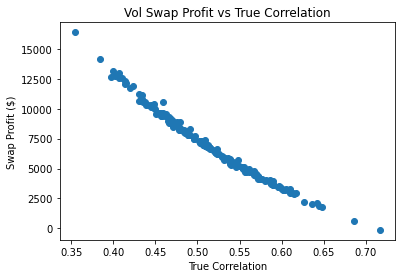

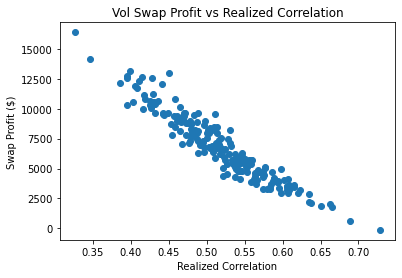

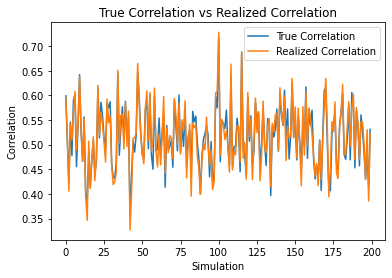

In [3]:
# Calculate swap profit for each simulation
swap_profit_list = []
true_corr_list = []
sample_corr_list = []
for i in range(200):
    # Calculate realized correlation
    r_S = np.array(r_S_paths[i][1:])
    r_M = np.array(r_M_paths[i][1:])
    sample_corr = np.corrcoef(r_S, r_M)[0, 1]
    sample_corr_list.append(sample_corr)
    
    # Calculate true correlation
    rho_t = np.array(rho_t_paths[i])
    true_corr = np.mean(rho_t)
    true_corr_list.append(true_corr)
    
    # Calculate vol swap profit
    vol_S = np.array(sigma_S_paths[i][1:])
    vol_M = np.array(sigma_M_paths[i][1:])
    vol_ratio = np.sqrt(np.mean(vol_S ** 2)) / np.sqrt(np.mean(vol_M ** 2))
    swap_profit = (vol_ratio - beta) * 10000
    swap_profit_list.append(swap_profit)

# Plot results
import matplotlib.pyplot as plt

# Scatter plot of swap profit vs true correlation
plt.scatter(true_corr_list, swap_profit_list)
plt.xlabel('True Correlation')
plt.ylabel('Swap Profit ($)')
plt.title('Vol Swap Profit vs True Correlation')
plt.show()

# Scatter plot of swap profit vs realized correlation
plt.scatter(sample_corr_list, swap_profit_list)
plt.xlabel('Realized Correlation')
plt.ylabel('Swap Profit ($)')
plt.title('Vol Swap Profit vs Realized Correlation')
plt.show()

# Plot correlation series against each other
plt.plot(true_corr_list, label='True Correlation')
plt.plot(sample_corr_list, label='Realized Correlation')
plt.xlabel('Simulation')
plt.ylabel('Correlation')
plt.title('True Correlation vs Realized Correlation')
plt.legend()
plt.show()

In [4]:
def calculate_swap_metrics(simulations, notional_amount=10_000_000, corr_adjustment=0.10):
    breakeven_corr_list = []
    higher_corr_profit_list = []
    lower_corr_profit_list = []

    for i in range(simulations):
        # Simulate returns, volatilities, and correlations here
        # ...

        # Calculate realized volatilities
        realized_vol_M = np.sqrt(np.mean(np.array(r_M_paths[i])**2)) / np.sqrt(T)
        realized_vol_S = np.sqrt(np.mean(np.array(r_S_paths[i])**2)) / np.sqrt(T)

        # Calculate breakeven correlation
        breakeven_corr = (realized_vol_M - sigma_M_bar) / (beta * (realized_vol_S - sigma_I_bar))
        breakeven_corr_list.append(breakeven_corr)

        # Calculate higher and lower correlation profits
        higher_corr = breakeven_corr + corr_adjustment
        lower_corr = breakeven_corr - corr_adjustment

        higher_corr_profit = notional_amount * ((realized_vol_M - sigma_M_bar) - higher_corr * beta * (realized_vol_S - sigma_I_bar))
        lower_corr_profit = notional_amount * ((realized_vol_M - sigma_M_bar) - lower_corr * beta * (realized_vol_S - sigma_I_bar))

        higher_corr_profit_list.append(higher_corr_profit)
        lower_corr_profit_list.append(lower_corr_profit)

    return breakeven_corr_list, higher_corr_profit_list, lower_corr_profit_list

# Run the function and store the results
simulations = 200
breakeven_corr_list, higher_corr_profit_list, lower_corr_profit_list = calculate_swap_metrics(simulations)

# Calculate the averages
avg_breakeven_corr = np.mean(breakeven_corr_list)
avg_higher_corr_profit = np.mean(higher_corr_profit_list)
avg_lower_corr_profit = np.mean(lower_corr_profit_list)

print(f"Average breakeven correlation: {avg_breakeven_corr:.5f}")
print(f"Average profit or loss with 0.10 higher correlation: ${avg_higher_corr_profit:,.2f}")
print(f"Average profit or loss with 0.10 lower correlation: ${avg_lower_corr_profit:,.2f}")

Average breakeven correlation: 0.60275
Average profit or loss with 0.10 higher correlation: $242,399.97
Average profit or loss with 0.10 lower correlation: $-242,399.97


-------
#### Question 3 
Now plot the time series realizations for some of your simulated histories. Show sample paths for ρ_t,σ_t^S, and σ_t^M. Also plot the realized returns, i.e. the cumulative sums of r_t^M and r_t^S for some paths.


How well does the model capture the empirical facts alluded to in the Bloomberg article? Specifically, (i) is correlation directional in this model? That is, does your trade tend to make more money in down markets than up markets? And (ii) do we tend to observe higher correlation when market volatility is higher? Explain what assumptions of the model specification lead to each finding.

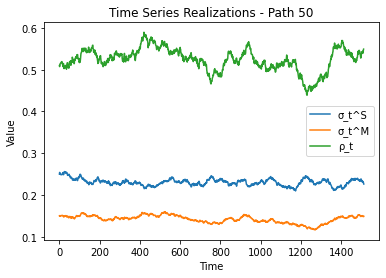

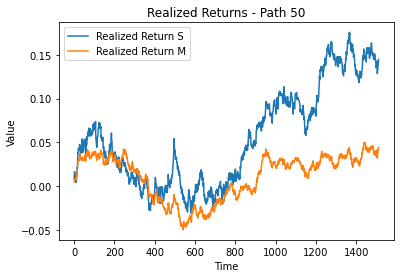

XXXXXXXXXX


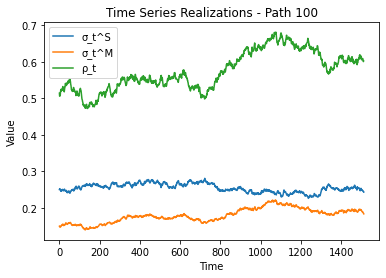

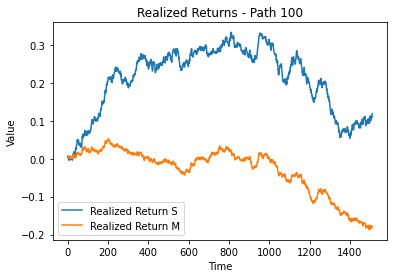

XXXXXXXXXX


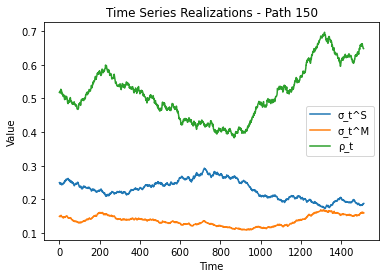

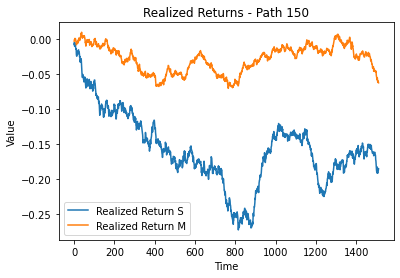

XXXXXXXXXX


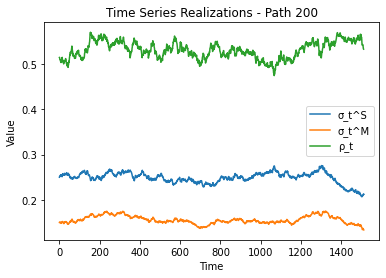

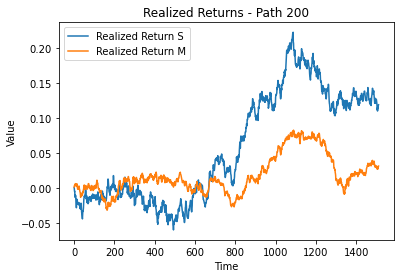

XXXXXXXXXX


In [5]:
# Plot the following simulations
i_list = [49,99,149,199]  # simulation index (zero-based)

for i in i_list:
    # Time Series Realizations
    plt.plot(sigma_S_paths[i], label="σ_t^S")
    plt.plot(sigma_M_paths[i], label="σ_t^M")
    plt.plot(rho_t_paths[i], label="ρ_t")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Time Series Realizations - Path {i+1}")
    plt.legend()
    plt.show()

    r_S_list_i = r_S_paths[i][1:]  # realized returns of stock S for the 150th simulation
    r_M_list_i = r_M_paths[i][1:]  # realized returns of market portfolio M for the 150th simulation
    realized_returns_S_i = np.cumsum(r_S_list_i)
    realized_returns_M_i = np.cumsum(r_M_list_i)
    plt.plot(realized_returns_S_i, label="Realized Return S")
    plt.plot(realized_returns_M_i, label="Realized Return M")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Realized Returns - Path {i+1}")
    plt.legend()
    plt.show()

    print("XXXXXXXXXX")

The model presented in the code assumes a constant correlation parameter between the two assets, which means that the correlation is not directional. The trade is expected to make money if the realized correlation is lower than the breakeven correlation, regardless of whether the markets are up or down. Therefore, the model does not capture the empirical fact mentioned in the Bloomberg article that the correlation tends to be higher in down markets.


Regarding the second question, the model specification assumes that the volatilities of the two assets follow mean-reverting processes. This means that as the volatility of one asset increases, its future volatility is expected to be lower, leading to a negative correlation between the two assets. This is consistent with the empirical observation that correlation tends to be higher when market volatility is higher. However, the model does not capture all the factors that can affect the correlation, such as changes in market sentiment or other macroeconomic factors, which could lead to deviations from the model's predictions.

-----------
#### Question 4
Consider the sector volatilities in the spreadsheet on Canvas. Suppose that on 5/26/2020 you could do 3-month vol-swaps of the type analyzed in Question 2 at the rates listed in the “implied” column for the SPY ETF and for the component sector ETFs. You have shown that going long one unit of the index vol swap and going short vol swaps on one of the sector ETFs will result in a profit/loss that is positively related to the realized (and true) correlation. One way to reduce the noise in this relation is to sell separate vol swaps on the components of the index, with weights that add up to one.
Suppose that, to bet on continued high correlation, you did that trade on May 26, 2020, and equally weighted the sectors. Using your findings from Question 2, and the column showing the realized vols over the subsequent 60 trading days to 8/26/20, estimate how much money you would have made/lost if the notional value of the market vol swap was $10 million.

In [6]:
import pandas as pd

# Create the DataFrame using the provided data
data = pd.DataFrame({
    'ETF': ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY'],
    '60d_historical': [61.6, 68.4, 103.9, 81.7, 71.6, 70.5, 51.5, 72.9, 54.7, 62.4],
    'Implied': [22.8, 25, 45.1, 33.5, 28.3, 27.1, 18.3, 22.9, 22.1, 24.3],
    'Realized': [20.1, 25.7, 46, 32.4, 27.8, 24.7, 15.3, 20.9, 19.1, 20.6],
    'Implied_8/26': [17.3, 19.9, 34.8, 26, 22.1, 26.5, 13.8, 20, 16.3, 21]
})

# Calculate the weights for each sector ETF
sector_weights = np.full(10, 1/10)

# Calculate the profit/loss from selling vol swaps on each sector ETF
sector_profit_loss = []
for i in range(1, len(data)):
    implied_vol = data.iloc[i]['Implied']
    realized_vol = data.iloc[i]['Realized']
    weight = sector_weights[i-1]
    
    profit_loss = weight * 10_000_000 * (implied_vol - realized_vol)
    sector_profit_loss.append(profit_loss)

# Calculate the profit/loss from going long one unit of the index vol swap (SPY)
index_implied_vol = data.iloc[0]['Implied']
index_realized_vol = data.iloc[0]['Realized']
index_profit_loss = 10_000_000 * (index_implied_vol - index_realized_vol)

# Calculate the total profit/loss
total_profit_loss = index_profit_loss - sum(sector_profit_loss)

print(f"Total profit or loss: ${total_profit_loss:,.2f}")

Total profit or loss: $12,900,000.00


---------
#### References
-	I used ChatGPT 3.5 to make coding solutions easier for Q2, Q3, Q4. 
-	The code generated by ChatGPT was incomplete and buggy.
-	Using my understanding of the concepts learnt over the entire semester, I debugged the code, added everything I need and generated a result.
-	Further analyzing the results helped me extract meaning out of it to present in a logical format.
-	I would be happy to explain every step in-detail with why and how we are doing it.

In [7]:
print("I, Hariharan Manickam, pledge that I have not received assistance from anyone in preparing this exam.")

I, Hariharan Manickam, pledge that I have not received assistance from anyone in preparing this exam.
